<a href="https://colab.research.google.com/github/codewithAshwani/MNIST-Speech-classification/blob/main/RNN_Speech_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from pickle import dump
from pickle import load
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow.keras as keras
from sklearn.preprocessing import StandardScaler
PICKLE_PATH = "feature.pkl"

In [2]:
def load_data(data_path):
     #Loads training dataset from data file.
     #   :return X (ndarray)
     #   :return y (ndarray)


    data = load(open(data_path, 'rb'))


    # convert lists to numpy arrays
    X = np.array(data["feauture_mfcc"])
    y = np.array(data["labels"])
#    y.astype(int)

    print("Data succesfully loaded!")

    return  X, y

In [3]:
# load data
X, y = load_data(PICKLE_PATH)

 # create train, validation and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_test = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)
X_validation = scaler.transform(X_validation.reshape(-1, X_validation.shape[-1])).reshape(X_validation.shape)
print(X_train.shape,y_train.shape)

Data succesfully loaded!
(1920, 55, 13) (1920,)


In [4]:
input_shape = (X_train.shape[1], X_train.shape[2])
input_shape

(55, 13)

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(128, input_shape=input_shape, return_sequences=True),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dense(10, activation='softmax')
])

loss = tf.keras.losses.SparseCategoricalCrossentropy()
optim = tf.keras.optimizers.Adam(lr=0.001)
metrics = ["accuracy"]
model.compile(loss=loss, optimizer=optim, metrics=metrics)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 55, 128)           72704     
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense (Dense)                (None, 128)               16512     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 222,090
Trainable params: 222,090
Non-trainable params: 0
_________________________________________________________________


In [6]:
# train model
history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=10, verbose=2)

Epoch 1/10
60/60 - 13s - loss: 1.5748 - accuracy: 0.4974 - val_loss: 0.8525 - val_accuracy: 0.7437
Epoch 2/10
60/60 - 8s - loss: 0.6149 - accuracy: 0.8365 - val_loss: 0.4404 - val_accuracy: 0.9062
Epoch 3/10
60/60 - 7s - loss: 0.4289 - accuracy: 0.9083 - val_loss: 0.3219 - val_accuracy: 0.9479
Epoch 4/10
60/60 - 7s - loss: 0.2740 - accuracy: 0.9521 - val_loss: 0.2761 - val_accuracy: 0.9563
Epoch 5/10
60/60 - 7s - loss: 0.2095 - accuracy: 0.9750 - val_loss: 0.2845 - val_accuracy: 0.9583
Epoch 6/10
60/60 - 7s - loss: 0.2214 - accuracy: 0.9682 - val_loss: 0.2427 - val_accuracy: 0.9688
Epoch 7/10
60/60 - 7s - loss: 0.1871 - accuracy: 0.9740 - val_loss: 0.2720 - val_accuracy: 0.9396
Epoch 8/10
60/60 - 7s - loss: 0.2049 - accuracy: 0.9661 - val_loss: 0.2669 - val_accuracy: 0.9458
Epoch 9/10
60/60 - 7s - loss: 0.1505 - accuracy: 0.9807 - val_loss: 0.1679 - val_accuracy: 0.9771
Epoch 10/10
60/60 - 7s - loss: 0.1465 - accuracy: 0.9797 - val_loss: 0.1507 - val_accuracy: 0.9812


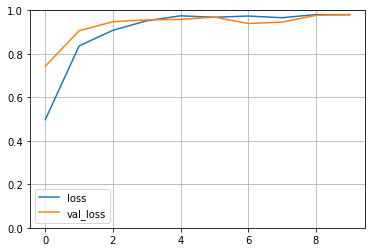

In [7]:
def plot_loss(history):
    plt.plot(history.history['accuracy'], label='loss')
    plt.plot(history.history['val_accuracy'], label='val_loss')
    plt.ylim([0.0, 1])
    plt.legend()
    plt.grid(True)
plot_loss(history)

In [8]:
score, acc = model.evaluate(X_test,y_test)
print('Test score:', score)
print('Test accuracy:', acc)

19/19 [==============================] - 2s 37ms/step - loss: 0.2048 - accuracy: 0.9650
Test score: 0.2048313468694687
Test accuracy: 0.9649999737739563


In [9]:
y_predic = np.argmax(model.predict(X_test), axis=1)

In [10]:
print(y_predic[:35])
print(y_test[:35])

[8 0 0 1 5 4 8 3 5 4 7 4 5 6 6 6 9 7 6 7 2 2 7 2 6 8 2 8 8 5 3 6 8 8 2]
[8 0 0 1 5 1 8 3 9 4 7 4 5 6 6 6 9 7 6 7 2 2 7 2 6 8 2 8 8 5 3 6 8 8 2]


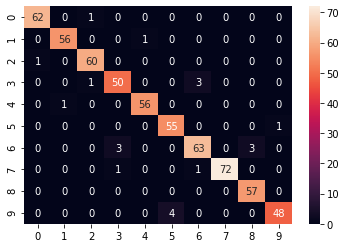

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf_matrix = confusion_matrix(y_test, y_predic)
sns.heatmap(cf_matrix, annot=True)